In [19]:

import sys
import pprint
sys.path.append('..')
from facerec.facerec import *

pprint.pprint(sys.path)

['/home/ito/facerec/notebooks',
 '/home/ito/.vscode-server/extensions/ms-toolsai.jupyter-2021.11.1001550889/pythonFiles',
 '/home/ito/.vscode-server/extensions/ms-toolsai.jupyter-2021.11.1001550889/pythonFiles/lib/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/ito/facerec/.venv/lib/python3.8/site-packages',
 '/home/ito/facerec/.venv/lib/python3.8/site-packages/IPython/extensions',
 '/home/ito/.ipython',
 '..',
 '..']


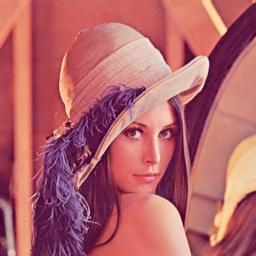

In [20]:
from PIL import Image
im = Image.open('../data/lena.jpg')
im

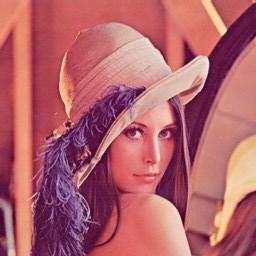

In [21]:
img = read_img('../data/lena.jpg')

hsv_img = rgb2hsv(img)
rgb_img = hsv2rgb(hsv_img)

pil_img = Image.fromarray(rgb_img)
pil_img


In [22]:
hsv2rgb(rgb2hsv(np.array([[[185, 98, 106]]])))

array([[[183,  97, 105]]], dtype=uint8)

In [23]:
rgb2hsv(np.array([[[252, 226, 196]]]))

array([[[32, 22, 98]]])

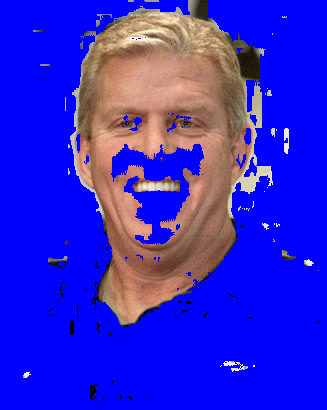

In [24]:
img_path = '../data/fddb/2003/01/01/big/img_547.jpg'
hsv_img = rgb2hsv(read_img(img_path))

# 肌色 #FCE2C4, H32 S22 V99 の部分を青に
skin_h = 32
delta_h = 20
hsv_img[(hsv_img[:, :, 0] < skin_h - delta_h) | (hsv_img[:, :, 0] > skin_h + delta_h)] = np.array([240, 100, 100])
Image.fromarray(hsv2rgb(hsv_img))

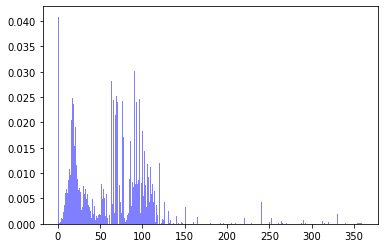

In [25]:
img_path = '../data/fddb/2003/01/01/big/img_547.jpg'
hsv_img = rgb2hsv(read_img(img_path))

n, bins, patches = plt.hist(hsv_img[:, :, 0].ravel(), range=(0, 360), bins=360, facecolor='blue', alpha=0.5, density=True)
plt.show()

元画像: (410, 327, 3)
トリム後: (234, 143, 3)


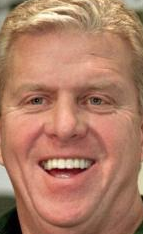

In [26]:
img_path = '../data/fddb/2003/01/01/big/img_547.jpg'
rgb_img = read_img(img_path)
print("元画像:", rgb_img.shape)

im_trim1 = trim(rgb_img, 90, 23, 143, 234)
print("トリム後:", im_trim1.shape)
Image.fromarray(im_trim1)


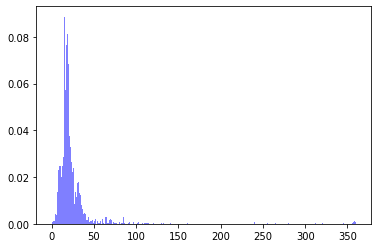

In [27]:
plt.hist(rgb2hsv(im_trim1)[:, :, 0].ravel(), range=(0, 360), bins=360, facecolor='blue', alpha=0.5, density=True)
plt.show()

In [28]:
hist1, bin_edges = np.histogram(rgb2hsv(im_trim1)[:, :, 0].ravel(), range=(0, 360), bins=360, density=True)
hist1

array([2.59996414e-03, 6.27577551e-04, 1.25515510e-03, 1.01607794e-03,
       4.39304285e-03, 3.58615743e-03, 8.87573964e-03, 1.38067061e-02,
       2.29514076e-02, 2.48341402e-02, 2.46847170e-02, 2.01721356e-02,
       2.45651784e-02, 3.28133405e-02, 2.85697209e-02, 8.86378579e-02,
       5.74084036e-02, 7.64449226e-02, 8.12563505e-02, 5.32245532e-02,
       6.83461837e-02, 3.76546530e-02, 3.26639173e-02, 2.63881418e-02,
       2.19950989e-02, 2.38778316e-02, 2.06204052e-02, 8.48723926e-03,
       1.34779750e-02, 1.13561652e-02, 1.74526328e-02, 1.79307872e-02,
       1.82595183e-02, 1.32687825e-02, 1.23124739e-02, 8.03896958e-03,
       6.48496802e-03, 4.27350427e-03, 4.63212002e-03, 1.40457833e-03,
       4.00454247e-03, 1.49423226e-03, 1.43446297e-03, 2.86892595e-03,
       7.17231486e-04, 1.16550117e-03, 1.34480904e-03, 1.16550117e-03,
       1.49423226e-03, 2.09192517e-04, 9.86193294e-04, 2.09192517e-03,
       9.26424003e-04, 5.97692905e-05, 1.10573187e-03, 5.37923615e-04,
      

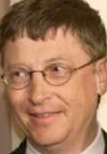

In [29]:
img_path = '../data/fddb/2002/11/01/big/img_733.jpg'
img2 = read_img(img_path)
# Image.fromarray(img2)
im_trim2 = trim(img2, 138, 42, 107, 154)
hist2, bin_edges = np.histogram(rgb2hsv(im_trim2)[:, :, 0].ravel(), range=(0, 360), bins=360, density=True)
Image.fromarray(im_trim2)

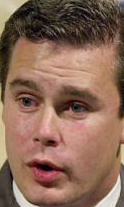

In [30]:
img_path = '../data/fddb/2002/11/20/big/img_269.jpg'
img3 = read_img(img_path)
# Image.fromarray(img3)
im_trim3 = trim(img3, 102, 28, 124, 207)
hist3, bin_edges = np.histogram(rgb2hsv(im_trim3)[:, :, 0].ravel(), range=(0, 360), bins=360, density=True)
Image.fromarray(im_trim3)

In [31]:
average_face_hue_hist = np.mean([hist1, hist2, hist3], axis=0)
average_face_hue_hist

array([3.04835956e-03, 1.32601762e-03, 1.30145604e-03, 1.66329916e-03,
       3.16555794e-03, 3.05243220e-03, 5.16625740e-03, 7.93547962e-03,
       1.07549606e-02, 1.35292765e-02, 1.66483876e-02, 9.95415530e-03,
       1.88309564e-02, 1.99170979e-02, 1.50963970e-02, 4.56345695e-02,
       3.53531300e-02, 4.93298967e-02, 5.70121399e-02, 4.67801777e-02,
       6.35779253e-02, 6.71962755e-02, 4.49931123e-02, 7.85064263e-02,
       4.10437754e-02, 3.50956695e-02, 4.33620845e-02, 1.39644385e-02,
       2.10271263e-02, 1.39480328e-02, 3.85766160e-02, 1.65112043e-02,
       1.79713180e-02, 1.47219497e-02, 2.92474775e-02, 8.37495794e-03,
       7.63046018e-03, 1.43622439e-02, 4.85858260e-03, 3.37365862e-03,
       4.30248509e-03, 3.01068880e-03, 4.13806038e-03, 6.38085776e-03,
       2.13233682e-03, 2.06673598e-03, 2.11052099e-03, 2.32071906e-03,
       2.72173922e-03, 1.29768930e-03, 9.60816963e-04, 1.86333310e-03,
       8.08284736e-04, 1.99230968e-05, 3.68577292e-04, 1.79307872e-04,
      

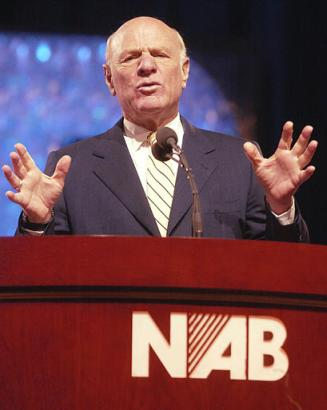

In [32]:
img_path = '../data/fddb/2003/05/05/big/img_44.jpg'
img = read_img(img_path)
Image.fromarray(img)

In [33]:
region_hists = region_hist(img, 2)
print(region_hists.shape, average_face_hue_hist.shape)
cos_sim_mat = cos_sim_matrix(region_hists, average_face_hue_hist)

(2, 2, 360) (360,)


ValueError: operands could not be broadcast together with shapes (2,2) (1,2,360) 